<a href="https://colab.research.google.com/github/sjuggchbydy/student_performance_prediction.ipynb/blob/main/student_performance_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Dataset Preview:
   StudyHours  Attendance  InternalMarks  FinalScore
0           2          60             15          50
1           3          65             16          55
2           4          70             17          60
3           5          72             18          62
4           6          75             19          65

Dataset Summary:
       StudyHours  Attendance  InternalMarks  FinalScore
count    10.00000   10.000000       10.00000   10.000000
mean      6.50000   77.000000       19.50000   68.200000
std       3.02765   10.944303        3.02765   12.099587
min       2.00000   60.000000       15.00000   50.000000
25%       4.25000   70.500000       17.25000   60.500000
50%       6.50000   76.500000       19.50000   67.500000
75%       8.75000   83.750000       21.75000   76.500000
max      11.00000   95.000000       24.00000   88.000000


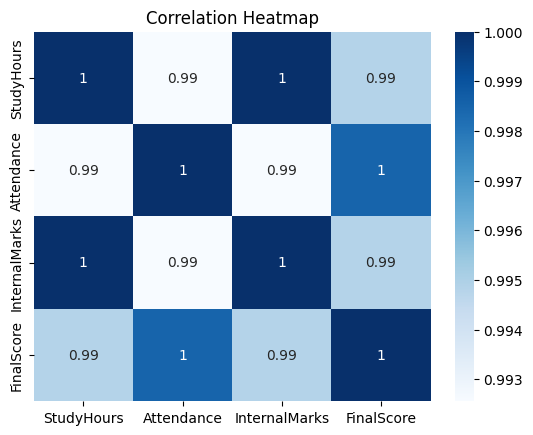


--- Linear Regression Results ---
MSE: 0.2936505603316004
R² Score: 0.9983887486401558

--- Decision Tree Results ---
MSE: 20.5
R² Score: 0.887517146776406

Predicted Final Score for New Student: 76.43009545199325


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [4]:
# ---------------------------------------------
# Student Performance Prediction (ML Mini Project)
# ---------------------------------------------

# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ---------------------------------------------
# Sample Dataset (You can replace it with CSV)
# ---------------------------------------------

data = {
    'StudyHours': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    'Attendance': [60, 65, 70, 72, 75, 78, 80, 85, 90, 95],
    'InternalMarks': [15, 16, 17, 18, 19, 20, 21, 22, 23, 24],
    'FinalScore': [50, 55, 60, 62, 65, 70, 72, 78, 82, 88]
}

df = pd.DataFrame(data)

# ---------------------------------------------
# Exploratory Data Analysis
# ---------------------------------------------

print("\nDataset Preview:")
print(df.head())

print("\nDataset Summary:")
print(df.describe())

# Visualizing correlations
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

# ---------------------------------------------
# Splitting Data
# ---------------------------------------------

X = df[['StudyHours', 'Attendance', 'InternalMarks']]
y = df['FinalScore']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# ---------------------------------------------
# Model 1: Linear Regression
# ---------------------------------------------

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_predictions = lr_model.predict(X_test)

print("\n--- Linear Regression Results ---")
print("MSE:", mean_squared_error(y_test, lr_predictions))
print("R² Score:", r2_score(y_test, lr_predictions))

# ---------------------------------------------
# Model 2: Decision Tree Regressor
# ---------------------------------------------

dt_model = DecisionTreeRegressor(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

dt_predictions = dt_model.predict(X_test)

print("\n--- Decision Tree Results ---")
print("MSE:", mean_squared_error(y_test, dt_predictions))
print("R² Score:", r2_score(y_test, dt_predictions))

# ---------------------------------------------
# Predicting new student performance
# ---------------------------------------------

new_student = [[8, 85, 21]]  # StudyHours, Attendance, InternalMarks
predicted_score = lr_model.predict(new_student)

print("\nPredicted Final Score for New Student:", predicted_score[0])
